In [1]:
import sys
import os
sys.path.append("../pyfesom")

import pyfesom as pf
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap, from_levels_and_colors
import numpy as np
#%matplotlib notebook
%matplotlib inline
from matplotlib import cm
from netCDF4 import Dataset, MFDataset
import xarray as xr
import pdb
import cmocean.cm as ocm
import glob
import pandas as pd
import matplotlib

No joblib
cartopy is not avalible, plotting will not work


In [2]:
def get_mesh(exp):
    masterPath='/albedo/work/projects/oce_rio/orichter/ollieWork/Misomip2/'
    meshpath  =os.path.join(masterPath,exp,'fesomInitialMesh')
    mesh = pf.fesom_mesh(meshpath, cavity=False)
    
    return mesh

def make_bidx(mesh):
    bidx=np.ones(mesh.n2d,dtype=int)*-999
    for i,prof in enumerate(mesh.n32):
        ii = np.where(prof!=-999)
        bidx[i]=prof[ii[0][-1]]-1
    return bidx

ImportError: cannot import name DivergingNorm

In [17]:
mesh=get_mesh('oo0021')

Find bottom layer indices and save as bind
Find bottom layer indices and save as bind
Load 2d part of the grid in 2 second(s)
Find bottom layer indices and save as bind
Load 3d part of the grid in 16 seconds


In [82]:
exp='oo0021'
year='2014-2018'

masterPath='/albedo/work/projects/oce_rio/orichter/ollieWork/Misomip2/'
bidx=make_bidx(mesh)

dataPath=os.path.join(masterPath,exp,'fesomData','%s.%s.oce.mean.nc'%(exp,year))
oce = xr.open_dataset(dataPath).mean('T')

tbm = oce.temp.load()
sbm = oce.salt.load()

In [18]:
fileHandle='2014-2018.wnetMean'
dataPath=os.path.join(masterPath,exp,'fesomData','%s.%s.nc'%(exp,fileHandle))
frc = xr.open_dataset(dataPath)
wnet = frc.wnet.squeeze().load().where(mesh.cflag)*365.25*24*3600

For depth 0 model level 0.0 will be used
For depth 0 model level 0.0 will be used


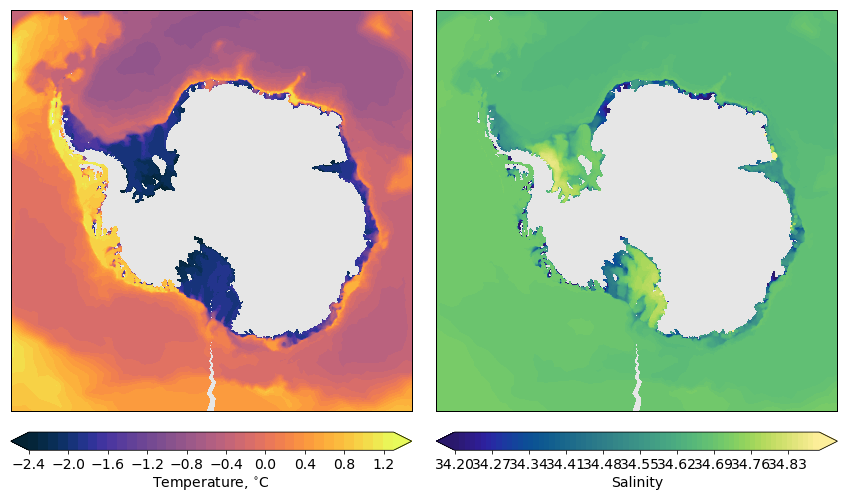

In [35]:
matplotlib.rcParams.update({'font.size': 14})
fig,axes = plt.subplots(ncols=2,figsize=(12,10))

ax0,ax1=axes.flatten()
m=Basemap(projection='spstere',boundinglat=-60,lon_0=180)
x, y = m(mesh.x2, mesh.y2)

level_data, elem_no_nan = pf.get_data(tbm[bidx],mesh,0)
levels = np.arange(-2.4, 1.4, 0.1)
m.drawmapboundary(fill_color='0.9',ax=ax0)
tp = ax0.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, cmap=ocm.thermal, extend='both')
cbar = plt.colorbar(tp,ax=ax0,orientation='horizontal', pad=0.03);
cbar.set_label("Temperature, $^{\circ}$C")

level_data, elem_no_nan = pf.get_data(sbm[bidx],mesh,0)
levels = np.arange(34.2, 34.9, 0.01)
m.drawmapboundary(fill_color='0.9',ax=ax1)
sp = ax1.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, cmap=ocm.haline, extend='both')
cbar = plt.colorbar(sp,ax=ax1,orientation='horizontal', pad=0.03);
cbar.set_label("Salinity")

plt.tight_layout()

plt.savefig('./figures/fesomSpinUpTempSaltMap.png')
plt.show()

For depth 0 model level 0.0 will be used
For depth 0 model level 0.0 will be used


/albedo/home/orichter/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
/albedo/home/orichter/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less


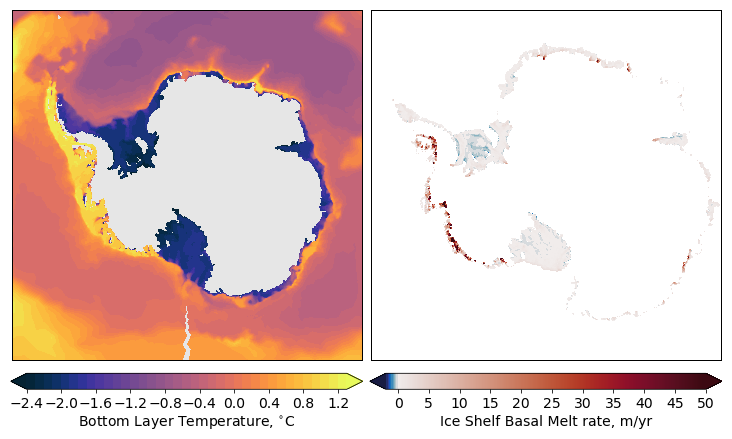

In [107]:
matplotlib.rcParams.update({'font.size': 14})
fig,axes = plt.subplots(ncols=2,figsize=(10,6))

ax0,ax1=axes.flatten()
m=Basemap(projection='spstere',boundinglat=-60,lon_0=180)
x, y = m(mesh.x2, mesh.y2)

level_data, elem_no_nan = pf.get_data(tbm[bidx],mesh,0)
levels = np.arange(-2.4, 1.4, 0.1)
m.drawmapboundary(fill_color='0.9',ax=ax0)
tp = ax0.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, cmap=ocm.thermal, extend='both')
cbar = plt.colorbar(tp,ax=ax0,orientation='horizontal', pad=0.03);
cbar.set_label("Bottom Layer Temperature, $^{\circ}$C")

m=Basemap(projection='spstere',boundinglat=-65,lon_0=180)
x, y = m(mesh.x2, mesh.y2)
level_data, elem_no_nan = pf.get_data(wnet,mesh,0)
levels = np.arange(-2.0,50.1,0.1)
level_data[level_data>max(levels)]=max(levels);
level_data[level_data<min(levels)]=min(levels);
m.drawmapboundary(fill_color='0.9',ax=ax1)
cmap = shiftedColorMap(ocm.balance,midpoint = (1 - max(levels)/(max(levels) + abs(min(levels)))))
    
wpl = ax1.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, cmap=cmap, extend='both')
ticks=list(np.arange(0,50.1,5))
#ticks.insert(0,-2)
cbar = plt.colorbar(wpl,ax=ax1,orientation='horizontal', pad=0.03,ticks=ticks);
cbar.set_label("Ice Shelf Basal Melt rate, m/yr")
ax1.set_facecolor('white')

plt.tight_layout(pad=0)

plt.savefig('./figures/fesomSpinUpTempMeltMap.png')
plt.show()

For depth 0 model level 0.0 will be used


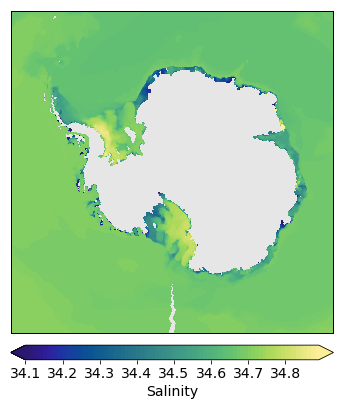

In [106]:
matplotlib.rcParams.update({'font.size': 14})
fig,ax = plt.subplots(figsize=(5,6))


m=Basemap(projection='spstere',boundinglat=-60,lon_0=180)
x, y = m(mesh.x2, mesh.y2)

level_data, elem_no_nan = pf.get_data(sbm[bidx],mesh,0)
levels = np.arange(34.1, 34.9, 0.01)
m.drawmapboundary(fill_color='0.9',ax=ax)
sp = ax.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, cmap=ocm.haline, extend='both')
cbar = plt.colorbar(sp,ax=ax,orientation='horizontal', pad=0.03,ticks=np.arange(34.1, 34.9, 0.1));
cbar.set_label("Salinity")

plt.tight_layout()

plt.savefig('./figures/fesomSpinUpSaltMap.png')
plt.show()

In [3]:
#%config InlineBackend.figure_format = 'png'
#%config InlineBackend.dpi = 300
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero
    
    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and 1.0.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          0.0 and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
      
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [4]:
def get_coord(ax,mesh,region=False):
    if region==False:
        m=Basemap(projection='spstere',boundinglat=-65,lon_0=180)
        m.drawmapboundary(fill_color='0.9')
        x, y = m(mesh.x2, mesh.y2)
    else:
        x, y = mesh.x2, mesh.y2
        ax.set_xlim([region[0],region[1]])
        ax.set_ylim([region[2],region[3]])
    

    return ax,[x,y]

def get_bt_ax(ax,exp,mesh,coord,levels='max',fileHandle='2014-2018.oce.mean'):
    bidx=make_bidx(mesh)
    
    dataPath=os.path.join(masterPath,exp,'fesomData','%s.%s.nc'%(exp,fileHandle))
    oce = xr.open_dataset(dataPath)
    #pdb.set_trace()
    tbm = oce.temp.squeeze()[bidx].load()
    #coord[2].bluemarble()

    level_data, elem_no_nan = pf.get_data(tbm,mesh,0)
        
    if levels=='max':
        levels=np.arange(level_data.min(),level_data.max())
    else:
        levels = levels
        
    tpl = ax.tricontourf(coord[0], coord[1], elem_no_nan[::], level_data, levels = levels,
                         alpha=1.0, cmap=ocm.thermal, extend='both')
    
    #level_data, elem_no_nan = pf.get_data(mesh.cflag,mesh,0)
    #gl = ax.tricontour(coord[0], coord[1], elem_no_nan[::], level_data,
    #                     alpha=1.0,colors=['white'],linewidths=0.2)
    
    cbar = plt.colorbar(tpl,orientation='vertical', pad=0.01);
    cbar.set_label("Temperature, $^{\circ}$C")
    
    #ax.set_facecolor('gray')
    return ax,tpl

from matplotlib.colors import LogNorm
def get_wnet_ax(ax,exp,mesh,coord,levels='max',cmap=ocm.balance,shifted=True,fileHandle='2014-2018.wnetMean',ticks=False):
    
    dataPath=os.path.join(masterPath,exp,'fesomData','%s.%s.nc'%(exp,fileHandle))
    frc = xr.open_dataset(dataPath)
    wnet = frc.wnet.squeeze().load().where(mesh.cflag)*365.25*24*3600

    level_data, elem_no_nan = pf.get_data(wnet,mesh,0)
        
    if levels=='max':
        levels=np.arange(level_data.min(),level_data.max())
    else:
        levels = levels
    #pdb.set_trace()  
    level_data[level_data>max(levels)]=max(levels);
    level_data[level_data<min(levels)]=min(levels);
    
    if shifted:
        cmap = shiftedColorMap(cmap,midpoint = (1 - max(levels)/(max(levels) + abs(min(levels)))))
    
    wpl = ax.tricontourf(coord[0], coord[1], elem_no_nan[::], level_data, levels = levels,
                    cmap=cmap, extend='both')
    
    if ticks:
        cbar = plt.colorbar(wpl,ax=ax,orientation='vertical', pad=0.03,ticks=ticks);
    else:
        cbar = plt.colorbar(wpl,ax=ax,orientation='vertical', pad=0.03);
    cbar.set_label("Melt rate, m/yr")
    ax.set_ylabel('Latitude ($\circ$C)')
    ax.set_xlabel('Longitude ($\circ$C)')
    #ax.axis_ticks('off')
    
    
    return ax,wpl

In [79]:
a=list(np.arange(-0.0,50.1,5))
a.insert(0,-2)
a

[-2, -0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0]

For depth 0 model level 0.0 will be used


/albedo/home/orichter/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:52: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/albedo/home/orichter/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in greater
/albedo/home/orichter/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in less


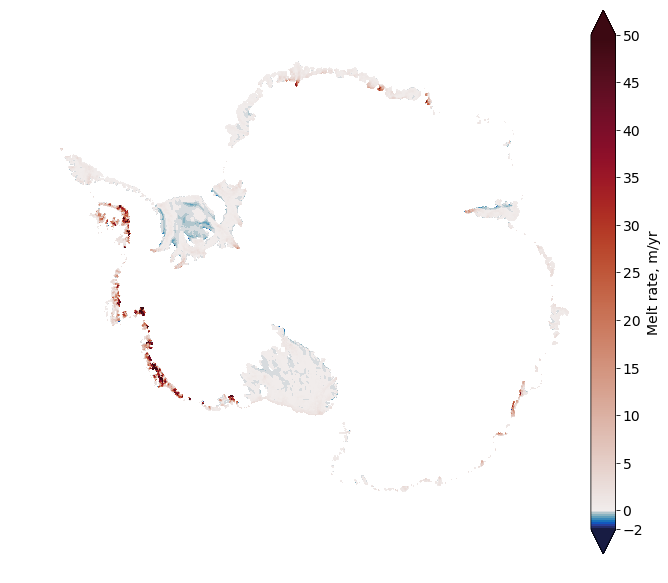

In [81]:
matplotlib.rcParams.update({'font.size': 14})
fig,ax = plt.subplots(figsize=(12,10))
#mesh = get_mesh('oo0020')
ax,coord=get_coord(ax,mesh)

#get_time_mask('oo0012','2013)
ax.set_facecolor('white')
#ax,tpl=get_bt_ax(ax,'oo0020',mesh,coord,levels=np.arange(-2.3, 1.5, 0.1))
ax,wpl=get_wnet_ax(ax,'oo0021',mesh,coord,levels=np.arange(-2.0,50.1,0.1),ticks=a)
#cbar=plt.colorbar(ticks=[1,2,3])
#ax,wpl=get_wnet_ax(ax,'oo0021',mesh,coord,levels=np.arange(20,100.1,0.1),cmap=ocm.thermal)

# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.axis('off')
#ax.set_xticks([])
#ax.set_yticks([])
plt.savefig('./figures/fesomSpinUpMeltMap.png')
plt.show()

For depth 0 model level 0.0 will be used


/albedo/home/orichter/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:52: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/albedo/home/orichter/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in greater
/albedo/home/orichter/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in less


For depth 0 model level 0.0 will be used


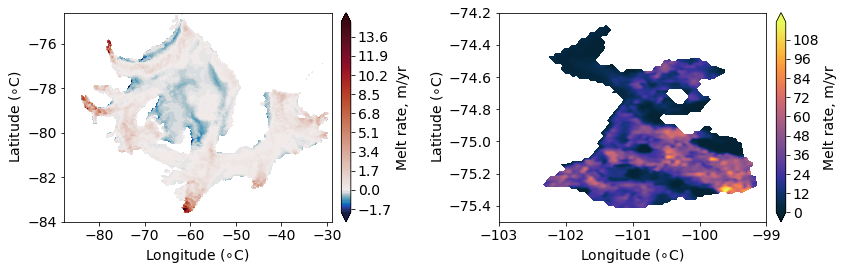

In [115]:
fig,axes = plt.subplots(ncols=2,figsize=(12,4))
ax0,ax1=axes.flatten()

ax0,coord=get_coord(ax0,mesh,region=[-87.7,-29,-84,-74.6])
ax0,wpl=get_wnet_ax(ax0,'oo0021',mesh,coord,levels=np.arange(-2,15,0.1),cmap=ocm.balance)

ax1,coord=get_coord(ax1,mesh,region=[-103,-99,-75.5,-74.2])
ax1,wpl=get_wnet_ax(ax1,'oo0021',mesh,coord,levels=np.arange(0.0,120,1),cmap=ocm.thermal,shifted=False)


plt.tight_layout()
plt.savefig('./figures/fesomSpinUpMeltMapFRISPIG.png')
#plt.show()

For depth 0 model level 0.0 will be used


/albedo/home/orichter/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:52: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/albedo/home/orichter/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in greater
/albedo/home/orichter/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in less


For depth 0 model level 0.0 will be used


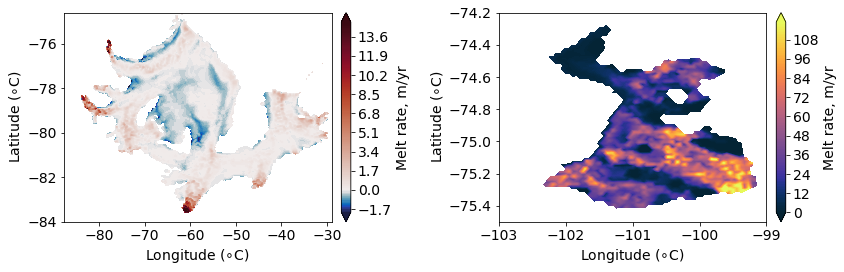

In [116]:
fig,axes = plt.subplots(ncols=2,figsize=(12,4))
ax0,ax1=axes.flatten()

ax0,coord=get_coord(ax0,mesh,region=[-87.7,-29,-84,-74.6])
ax0,wpl=get_wnet_ax(ax0,'oo0020',mesh,coord,levels=np.arange(-2,15,0.1),cmap=ocm.balance)

ax1,coord=get_coord(ax1,mesh,region=[-103,-99,-75.5,-74.2])
ax1,wpl=get_wnet_ax(ax1,'oo0020',mesh,coord,levels=np.arange(0.0,120,1),cmap=ocm.thermal,shifted=False)


plt.tight_layout()
plt.savefig('./figures/fesomSpinUpMeltMapFRISPIGCdHigh.png')
#plt.show()

NameError: name 'mesh' is not defined

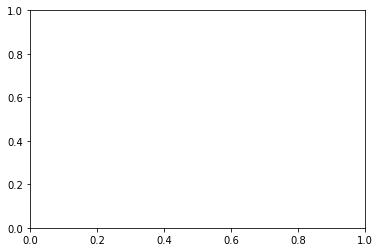

In [5]:
fig,ax = plt.subplots()
#mesh = get_mesh('oo0020')
ax,coord=get_coord(ax,mesh,region=[-103,-99,-75.5,-74.2])
#tmask=get_time_mask('oo0020','2013')
#ax,tpl=get_bt_ax(ax,'oo0020',mesh,coord,levels=np.arange(-2.3, 1.5, 0.1))
ax,wpl=get_wnet_ax(ax,'oo0020',mesh,coord,levels=np.arange(0.0,101,1),cmap=ocm.thermal,shifted=False)
ax.set_ylabel('Latitude ($\circ$C)')
ax.set_xlabel('Longitude ($\circ$C)')
plt.tight_layout()
#plt.savefig('./figures/fesomSpinUpMeltMapPIG.png')
#plt.show()

In [ ]:
plot_bmb(wnet[11:],'FRIS','RA','1/1/1980','Avg melt FRIS oo0020')
plot_bmb(wnet[11:],'PIG','RA','1/1/1980','Avg melt PIG oo0020')

For depth 0 model level 0.0 will be used


/albedo/home/orichter/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:52: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/albedo/home/orichter/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in greater
/albedo/home/orichter/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in less


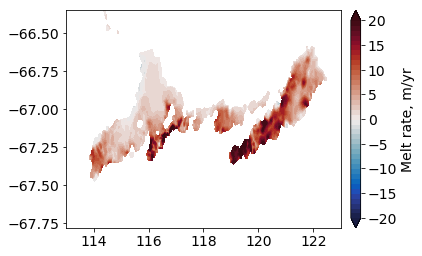

In [53]:
fig,ax = plt.subplots()
#mesh = get_mesh('oo0020')
ax,coord=get_coord(ax,mesh,region=[113.0,123.0,-67.78,-66.35])
#tmask=get_time_mask('oo0020','2013')
#ax,tpl=get_bt_ax(ax,'oo0020',mesh,coord,levels=np.arange(-2.3, 1.5, 0.1))
ax,wpl=get_wnet_ax(ax,'oo0021',mesh,coord,levels=np.arange(-20,20.01,1),cmap=ocm.balance)
#plt.show()

In [ ]:
plt.rcParams.update({'font.size': 18})
    
    masterPath='/albedo/work/projects/oce_rio/orichter/ollieWork/Misomip2/'
    meshpath  =os.path.join(masterPath,exp,'fesomInitialMesh')
    mesh = pf.fesom_mesh(meshpath, cavity=False)

    diagPath=os.path.join(masterPath,exp,'fesomData','%s.%s.mesh.diag.nc' %(exp,year))
    meshDiag = xr.open_dataset(diagPath)
    
    dataPath=os.path.join(masterPath,exp,'fesomData','%s.%s.forcing.diag.nc' %(exp,year))
    frc = xr.open_mfdataset(dataPath)
    wnet = frc.wnet.mean('T').where(mesh.cflag)*365.25*24*3600
    
    m=Basemap(projection='spstere',boundinglat=-64,lon_0=180)
    level_data, elem_no_nan = pf.get_data(wnet,mesh,0)

    plt.figure(figsize=(10,12))
    m.drawmapboundary(fill_color='0.9')
    #m.bluemarble(alpha=0.5)
    #m.fillcontinents(color='coral',lake_color='aqua')
    #m.drawcoastlines()
    x, y = m(mesh.x2, mesh.y2)
    levels = np.arange(0, 6., 0.1)
    plt.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, cmap=cm.gist_heat_r, extend='both')
    cbar = plt.colorbar(orientation='horizontal', pad=0.03);
    cbar.set_label("ice shelf melt rate, m/yr")
    plt.title('%s, %s mean basal melt'%(exp,year))
    plt.tight_layout()

For depth 0 model level 0.0 will be used


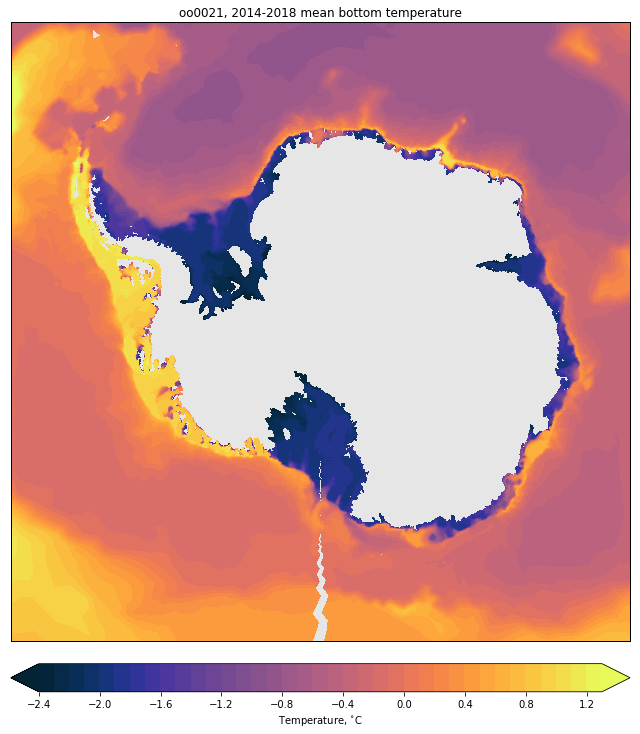

In [12]:
m=Basemap(projection='spstere',boundinglat=-60,lon_0=180)
level_data, elem_no_nan = pf.get_data(tbm[bidx],mesh,0)

plt.figure(figsize=(9,11))
m.drawmapboundary(fill_color='0.9')
#m.drawcoastlines()
x, y = m(mesh.x2, mesh.y2)
#levels=np.arange(level_data.min(),level_data.max())
levels = np.arange(-2.4, 1.4, 0.1)
plt.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, cmap=ocm.thermal, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Temperature, $^{\circ}$C")
plt.title('%s, %s mean bottom temperature'%(exp,year))
plt.tight_layout()
plt.show()

For depth 0 model level 0.0 will be used


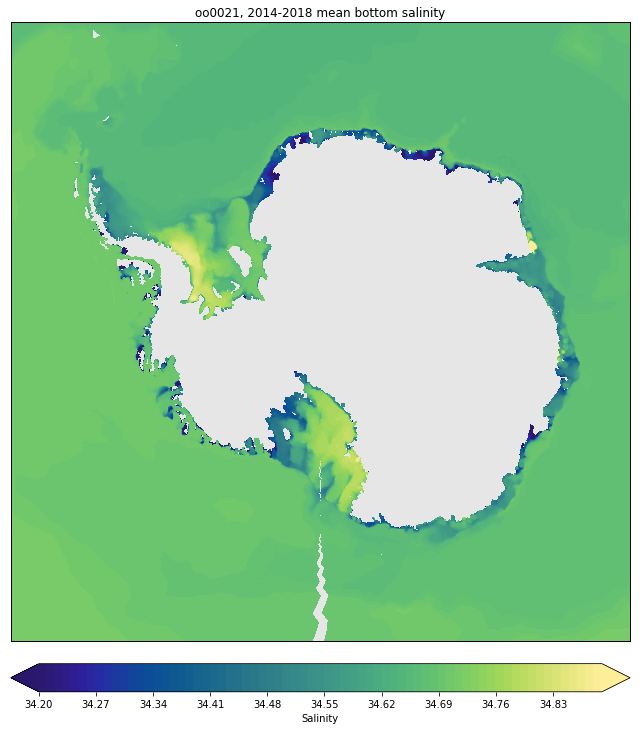

In [22]:
sbm = oce.salt.load()

m=Basemap(projection='spstere',boundinglat=-60,lon_0=180)

level_data, elem_no_nan = pf.get_data(sbm[bidx],mesh,0)

plt.figure(figsize=(9,11))
m.drawmapboundary(fill_color='0.9')
#m.drawcoastlines()
x, y = m(mesh.x2, mesh.y2)
#levels=np.arange(level_data.min(),level_data.max())
levels = np.arange(34.2, 34.9, 0.01)
plt.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, cmap=ocm.haline, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Salinity")
plt.title('%s, %s mean bottom salinity'%(exp,year))
plt.tight_layout()
plt.show()

In [14]:
oce.temp.mean('T')

<xarray.DataArray 'temp' (nodes_3d: 9699405)>
array([-1.748058, -1.758297, -1.744212, ..., -0.165991, -0.300361, -0.391163],
      dtype=float32)
Dimensions without coordinates: nodes_3d

/albedo/home/orichter/.conda/envs/py27/lib/python2.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


For depth 0 model level 0.0 will be used


ValueError: zero-size array to reduction operation maximum which has no identity

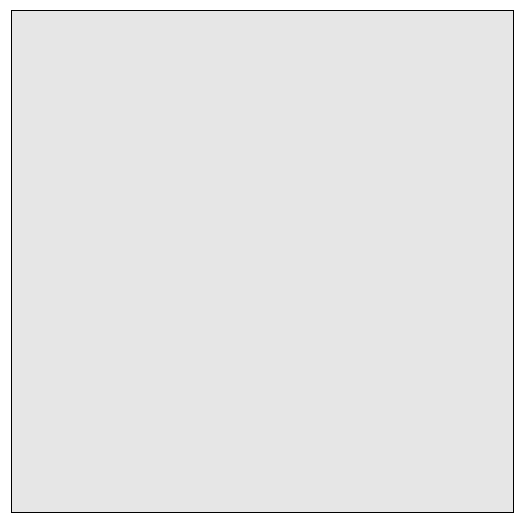

In [9]:
#mesh=get_mesh('oo0021')
plot_bottomTS('oo0021','2014-2018',mesh)

In [20]:
def get_mesh(exp):
    masterPath='/albedo/work/projects/oce_rio/orichter/ollieWork/Misomip2/'
    meshpath  =os.path.join(masterPath,exp,'fesomInitialMesh')
    mesh = pf.fesom_mesh(meshpath, cavity=False)
    
    return mesh

def make_bidx(mesh):
    bidx=np.ones(mesh.n2d,dtype=int)*-999
    for i,prof in enumerate(mesh.n32):
        ii = np.where(prof!=-999)
        bidx[i]=prof[ii[0][-1]]-1
    return bidx



def plot_bottomTS(exp,year,mesh=False,month=False,region=False,
                  tlevels=np.arange(-2.2, 0, 0.1),wlevels=np.arange(-1, 10, 0.1),figsize=(9,11)):
    
    masterPath='/albedo/work/projects/oce_rio/orichter/ollieWork/Misomip2/'
    if mesh==False:
        meshpath  =os.path.join(masterPath,exp,'fesomInitialMesh')
        mesh = pf.fesom_mesh(meshpath, cavity=False)
    bidx=make_bidx(mesh)
    
    dataPath=os.path.join(masterPath,exp,'fesomData','%s.%s.oce.mean.nc'%(exp,year))
    oce = xr.open_dataset(dataPath).load()
    
    dataPath=os.path.join(masterPath,exp,'fesomData','%s.%s.wnetMean.nc' %(exp,year))
    frc = xr.open_dataset(dataPath).load()
    
    #level_data, elem_no_nan = pf.get_data(wnet,mesh,0)
    mask = oce.temp[:,0]!=0
    #pdb.set_trace()
    if month==False:
        tbm = oce['temp'][mask].mean('T').load()
        wnet = frc['wnet'][mask].mean('T').where(mesh.cflag).load()*365.25*24*3600
    else:
        tbm = oce['temp'][mask][month].load()
        wnet = frc['wnet'][mask][month].where(mesh.cflag).load()*365.25*24*3600
    
    level_data_temp, elem_no_nan_temp = pf.get_data(tbm[bidx],mesh,0)
    level_data_wnet, elem_no_nan_wnet = pf.get_data(wnet,mesh,0)

    plt.figure(figsize=figsize)
    if region==False:
        m=Basemap(projection='spstere',boundinglat=-60,lon_0=180)
        m.drawmapboundary(fill_color='0.9')
        x, y = m(mesh.x2, mesh.y2)
    else:
        x, y = mesh.x2, mesh.y2
        plt.xlim([region[0],region[1]])
        plt.ylim([region[2],region[3]])
        
    if tlevels=='max':
        tlevels=np.arange(level_data_temp.min(),level_data_temp.max())
    else:
        tlevels = tlevels
        
    if wlevels=='max':
        wlevels=np.arange(level_data_wnet.min(),level_data_wnet.max())
    else:
        wlevels = wlevels
        
    plt.tricontourf(x, y, elem_no_nan_temp[::], level_data_temp, levels = tlevels, cmap='jet', extend='both')
    cbar = plt.colorbar(orientation='horizontal', pad=0.03);
    cbar.set_label("Temperature, $^{\circ}$C")
    
    plt.tricontourf(x, y, elem_no_nan_wnet[::], level_data_wnet, levels = tlevels, cmap='jet', extend='both')
    cbar = plt.colorbar(orientation='horizontal', pad=0.03);
    #cbar.set_label("Temperature, $^{\circ}$C")
    plt.show()
    #plt.title('%s, %s, %s mean bottom temperature'%(exp,year,month))
    #plt.tight_layout()

In [21]:
#mesh = get_mesh('oo0021')
plot_bottomTS('oo0021','2014-2018',mesh=mesh)

In [ ]:
def plot_melt(exp,year):
    
    plt.rcParams.update({'font.size': 18})
    
    masterPath='/albedo/work/projects/oce_rio/orichter/ollieWork/Misomip2/'
    meshpath  =os.path.join(masterPath,exp,'fesomInitialMesh')
    mesh = pf.fesom_mesh(meshpath, cavity=False)

    diagPath=os.path.join(masterPath,exp,'fesomData','%s.%s.mesh.diag.nc' %(exp,year))
    meshDiag = xr.open_dataset(diagPath)
    
    dataPath=os.path.join(masterPath,exp,'fesomData','%s.%s.forcing.diag.nc' %(exp,year))
    frc = xr.open_mfdataset(dataPath)
    wnet = frc.wnet.mean('T').where(mesh.cflag)*365.25*24*3600
    
    m=Basemap(projection='spstere',boundinglat=-64,lon_0=180)
    level_data, elem_no_nan = pf.get_data(wnet,mesh,0)

    plt.figure(figsize=(10,12))
    m.drawmapboundary(fill_color='0.9')
    #m.bluemarble(alpha=0.5)
    #m.fillcontinents(color='coral',lake_color='aqua')
    #m.drawcoastlines()
    x, y = m(mesh.x2, mesh.y2)
    levels = np.arange(0, 6., 0.1)
    plt.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, cmap=cm.gist_heat_r, extend='both')
    cbar = plt.colorbar(orientation='horizontal', pad=0.03);
    cbar.set_label("ice shelf melt rate, m/yr")
    plt.title('%s, %s mean basal melt'%(exp,year))
    plt.tight_layout()

In [59]:
exp='oo0021'
masterPath='/isibhv/netscratch/orichter/'

#files = np.sort(glob.glob(os.path.join(masterPath,'timmsdata',exp,'%s.*.oce.mean.nc'%(exp))))[0:40]
files = np.sort(glob.glob(os.path.join(masterPath,'timmsdata',exp,'%s.*.oce.mean.nc'%(exp))))[0:40]
ocem = xr.open_mfdataset(files)

files = np.sort(glob.glob(os.path.join(masterPath,'timmsdata',exp,'%s.*.oce.diag.nc'%(exp))))[0:40]
od = xr.open_mfdataset(files)

meshpath  =os.path.join(masterPath,'timmsmesh',exp)
#mesh = pf.fesom_mesh(meshpath, cavity=False)

diagPath=os.path.join(masterPath,'timmsdata',exp,'%s.%s.mesh.diag.nc' %(exp,1979))
meshDiag = xr.open_dataset(diagPath).sel(T=0)

maskTime=ocem.temp[:,0]!=0.0
onShelfMask=((mesh.topo<2500) & (mesh.y2<-60))
onShelfMask3d = mesh.n32[onShelfMask]
onShelfMask3d = onShelfMask3d[onShelfMask3d>0]-1

For depth 0 model level 0.0 will be used


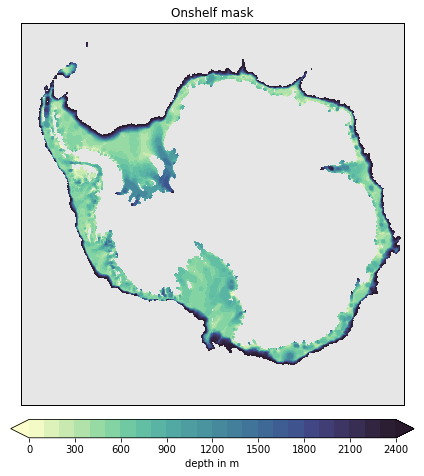

In [3]:
level_data, elem_no_nan = pf.get_data(xr.DataArray(mesh.topo,dims='nodes_2d').where(onShelfMask),mesh,0)
#m = Basemap(projection='robin',lon_0=0, resolution='c')
m=Basemap(projection='spstere',boundinglat=-63,lon_0=180)
plt.figure(figsize=(6,7))
m.drawmapboundary(fill_color='0.9')
#m.drawcoastlines()
x, y = m(mesh.x2, mesh.y2)
#levels=np.arange(level_data.min(),level_data.max())
levels = np.arange(0, 2500, 100)
plt.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, \
                cmap=ocm.deep, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("depth in m")
plt.title('Onshelf mask')
plt.tight_layout()

In [60]:
cp_rho = 3990*1026
C2K = 273.15
weights=meshDiag.cluster_vol[onShelfMask3d]/meshDiag.cluster_vol[onShelfMask3d].sum()
tempOnShelf=(ocem.temp[maskTime,onShelfMask3d]*weights).sum('nodes_3d').load()

In [61]:
g2kg=1000
rho=1026
saltOnShelf=(ocem.salt[maskTime,onShelfMask3d]*weights).sum('nodes_3d').load()

In [62]:
TKEOnShelf = 0.5*((od.uu[maskTime,onShelfMask3d]+od.vv[maskTime,onShelfMask3d])*weights).sum('nodes_3d').load()

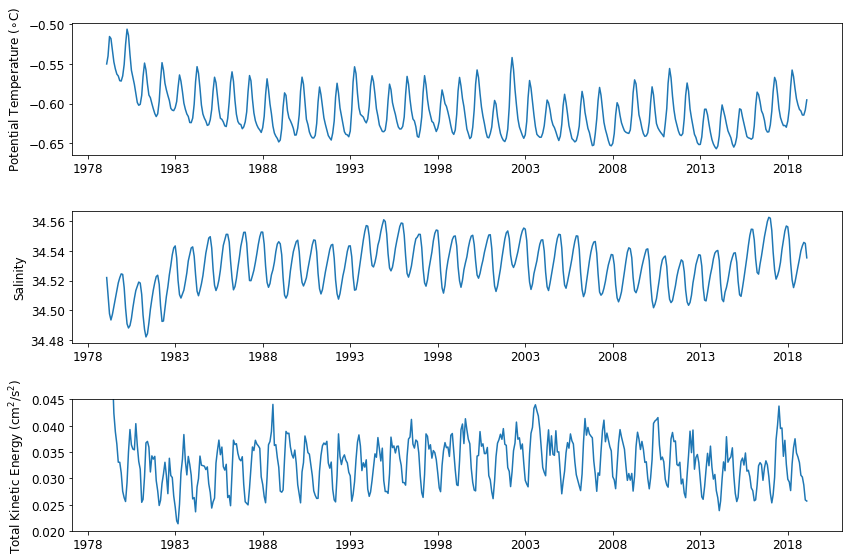

In [77]:
matplotlib.rcParams.update({'font.size': 12})
time = pd.date_range('1979',freq="M",periods=481)

fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(12,8))

ax0,ax1,ax2=axes.flatten()

ax0.plot(time,tempOnShelf)
ax0.set_ylabel('Potential Temperature ($\circ$C)')

ax1.plot(time,saltOnShelf)
ax1.set_ylabel('Salinity')

ax2.plot(time,TKEOnShelf*100)
ax2.set_ylim([0.02,0.045])
ax2.set_ylabel('Total Kinetic Energy (cm$^2$/s$^2$)')

#ax.plot(np.cumsum(bmb_ice[:-2]-bmb_oce),label='cumsum')
plt.tight_layout()
plt.savefig('./figures/fesomIntSpinUp.png')
plt.show()